## Dataset Information

This data set contains a total 5820 evaluation scores provided by students from Gazi University in Ankara (Turkey). There is a total of 28 course specific questions and additional 5 attributes.

#### Attribute Information:

instr: Instructor's identifier; values taken from {1,2,3} \
class: Course code (descriptor); values taken from {1-13} \
repeat: Number of times the student is taking this course; values taken from {0,1,2,3,...}\
attendance: Code of the level of attendance; values from {0, 1, 2, 3, 4}\
difficulty: Level of difficulty of the course as perceived by the student; values taken from {1,2,3,4,5}\
Q1: The semester course content, teaching method and evaluation system were provided at the start.\
Q2: The course aims and objectives were clearly stated at the beginning of the period.\
Q3: The course was worth the amount of credit assigned to it.\
Q4: The course was taught according to the syllabus announced on the first day of class.\
Q5: The class discussions, homework assignments, applications and studies were satisfactory.\
Q6: The textbook and other courses resources were sufficient and up to date.\
Q7: The course allowed field work, applications, laboratory, discussion and other studies.\
Q8: The quizzes, assignments, projects and exams contributed to helping the learning.\
Q9: I greatly enjoyed the class and was eager to actively participate during the lectures.\
Q10: My initial expectations about the course were met at the end of the period or year.\
Q11: The course was relevant and beneficial to my professional development.\
Q12: The course helped me look at life and the world with a new perspective.\
Q13: The Instructor's knowledge was relevant and up to date.\
Q14: The Instructor came prepared for classes.\
Q15: The Instructor taught in accordance with the announced lesson plan.\
Q16: The Instructor was committed to the course and was understandable.\
Q17: The Instructor arrived on time for classes.\
Q18: The Instructor has a smooth and easy to follow delivery/speech.\
Q19: The Instructor made effective use of class hours.\
Q20: The Instructor explained the course and was eager to be helpful to students.\
Q21: The Instructor demonstrated a positive approach to students.\
Q22: The Instructor was open and respectful of the views of students about the course.\
Q23: The Instructor encouraged participation in the course.\
Q24: The Instructor gave relevant homework assignments/projects, and helped/guided students.\
Q25: The Instructor responded to questions about the course inside and outside of the course.\
Q26: The Instructor's evaluation system (midterm and final questions, projects, assignments, etc.) effectively measured the course objectives.\
Q27: The Instructor provided solutions to exams and discussed them with students.\
Q28: The Instructor treated all students in a right and objective manner.

Q1-Q28 are all Likert-type, meaning that the values are taken from {1,2,3,4,5}\

## # Libraries

<li>pandas
<li>matplotlib
<li>seaborn
<li>scikit-learn
<li>scipy

# Algorithms

<li>Principal Component Analysis
<li>Kmeans Clustering
<li>Agglomerative Clustering

## Import modules

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## Loading the dataset

In [3]:
df = pd.read_csv("turkiye-student-evaluation_generic  sv.csv")
df.head()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1,2,1,0,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
1,1,2,1,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
2,1,2,1,2,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
3,1,2,1,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
4,1,2,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [4]:
# statistical info
df.describe()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
count,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.00000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000
mean,2.485567,7.276289,1.214089,1.675601,2.783505,2.929897,3.073883,3.178694,3.082474,3.105842,3.107388,3.066323,3.041924,3.165979,3.090722,3.183849,3.035567,3.242784,3.290893,3.287285,3.169588,3.398454,3.222509,3.261684,3.285395,3.307388,3.317526,3.20189,3.166838,3.312543,3.222165,3.154811,3.308076
std,0.718473,3.688175,0.532376,1.474975,1.348987,1.341077,1.285251,1.253567,1.284594,1.278989,1.280807,1.279097,1.283481,1.268930,1.275309,1.295443,1.305772,1.264201,1.255373,1.253122,1.288015,1.267530,1.279799,1.268442,1.276848,1.269974,1.268358,1.27259,1.275909,1.257286,1.270695,1.291872,1.278709
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,4.000000,1.000000,0.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,2.00000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,3.000000,7.000000,1.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,3.000000,10.000000,1.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000
max,3.000000,13.000000,3.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000


In [5]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5820 entries, 0 to 5819
Data columns (total 33 columns):
instr         5820 non-null int64
class         5820 non-null int64
nb.repeat     5820 non-null int64
attendance    5820 non-null int64
difficulty    5820 non-null int64
Q1            5820 non-null int64
Q2            5820 non-null int64
Q3            5820 non-null int64
Q4            5820 non-null int64
Q5            5820 non-null int64
Q6            5820 non-null int64
Q7            5820 non-null int64
Q8            5820 non-null int64
Q9            5820 non-null int64
Q10           5820 non-null int64
Q11           5820 non-null int64
Q12           5820 non-null int64
Q13           5820 non-null int64
Q14           5820 non-null int64
Q15           5820 non-null int64
Q16           5820 non-null int64
Q17           5820 non-null int64
Q18           5820 non-null int64
Q19           5820 non-null int64
Q20           5820 non-null int64
Q21           5820 non-null int64
Q22      

In [40]:
df.shape

(5820, 33)

## Preprocessing the dataset

In [6]:
# check for null values
df.isnull().sum()

instr         0
class         0
nb.repeat     0
attendance    0
difficulty    0
Q1            0
Q2            0
Q3            0
Q4            0
Q5            0
Q6            0
Q7            0
Q8            0
Q9            0
Q10           0
Q11           0
Q12           0
Q13           0
Q14           0
Q15           0
Q16           0
Q17           0
Q18           0
Q19           0
Q20           0
Q21           0
Q22           0
Q23           0
Q24           0
Q25           0
Q26           0
Q27           0
Q28           0
dtype: int64

## Exploratory Data Analysis

## To Understand for which course the students have given the most responses and it is found to be Course 3 from below graph

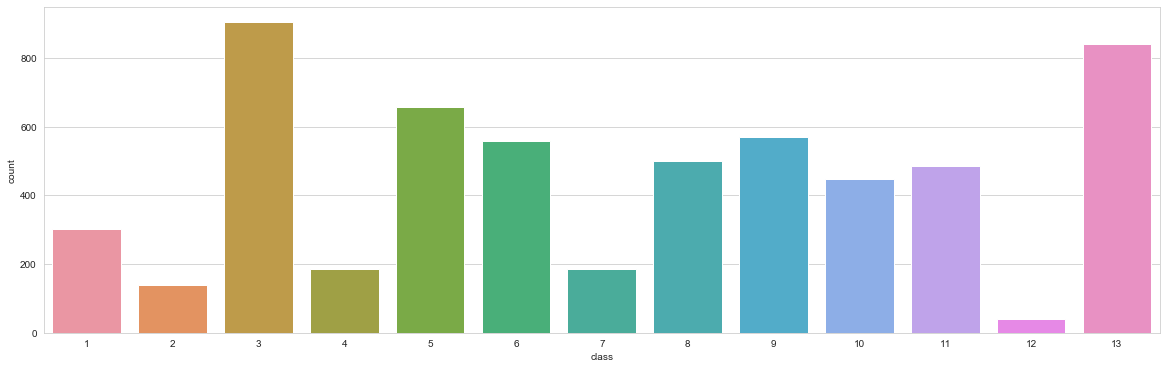

In [8]:
plt.figure(figsize=(20, 6))
sns.countplot(x='class', data=df)

# Below Graph to see how the rating has been given by student for each questions

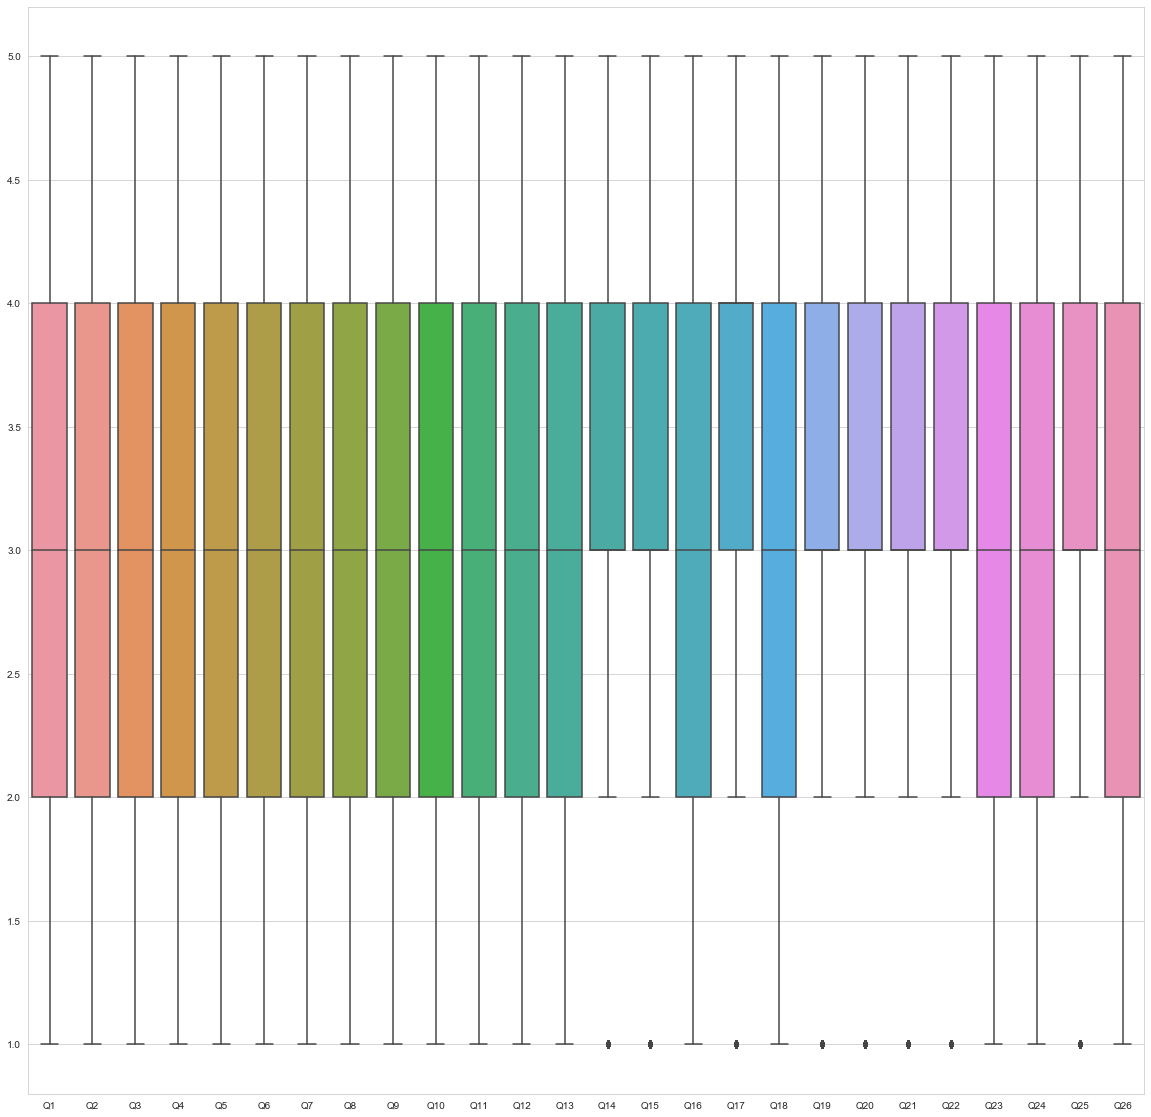

In [10]:
plt.figure(figsize=(20, 20))
sns.boxplot(data=df.iloc[:,5:31 ]);

## By above graph, we can see that very less students have given completely disagree (Rating 1) for Question Q14, Q15, Q17, Q19 - Q22, Q25

# Lets understand the students have reponded for the questions against classes

In [12]:
# Calculate mean for each question response for all the classes.
questionmeans = []
classlist = []
questions = []
totalplotdata = pd.DataFrame(list(zip(classlist,questions,questionmeans))
                      ,columns=['class','questions', 'mean'])
for class_num in range(1,13):
    class_data = df[(df["class"]==class_num)]
    
    questionmeans = []
    classlist = []
    questions = []
    
    for num in range(1,13):
        questions.append(num)
    #Class related questions are from Q1 to Q12
    for col in range(5,17):
        questionmeans.append(class_data.iloc[:,col].mean())
    classlist += 12 * [class_num] 
    print(classlist)
    plotdata = pd.DataFrame(list(zip(classlist,questions,questionmeans))
                      ,columns=['class','questions', 'mean'])
    totalplotdata = totalplotdata.append(plotdata, ignore_index=True)
    

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]
[7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]
[8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8]
[9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]
[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]
[11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11]
[12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12]


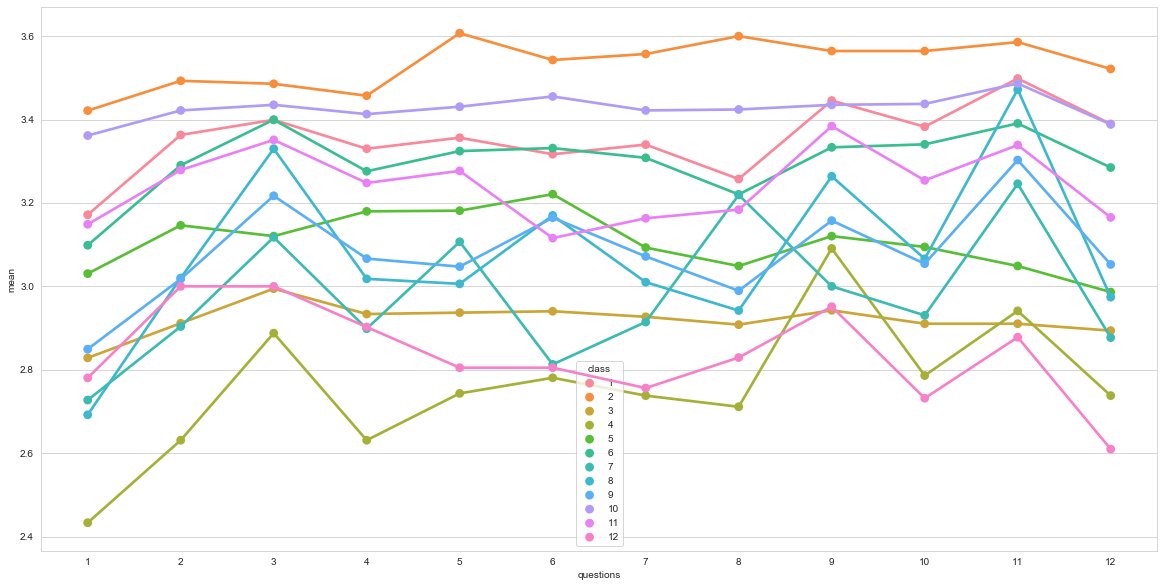

In [13]:
plt.figure(figsize=(20, 10))
sns.pointplot(x="questions", y="mean", data=totalplotdata, hue="class")

## Above graph shows that we have best ratings from Class 2 and worst rateing from class 4 students

# Lets see how rating has been given against instructor wise.

In [15]:
# Calculate mean for each question response for all the classes.
questionmeans = []
inslist = []
questions = []
totalplotdata = pd.DataFrame(list(zip(inslist,questions,questionmeans))
                      ,columns=['ins','questions', 'mean'])
for ins_num in range(1,4):
    ins_data = df[(df["instr"]==ins_num)]
    questionmeans = []
    inslist = []
    questions = []
    
    for num in range(13,29):
        questions.append(num)
    
    for col in range(17,33):
        questionmeans.append(ins_data.iloc[:,col].mean())
    inslist += 16 * [ins_num] 
    plotdata = pd.DataFrame(list(zip(inslist,questions,questionmeans))
                      ,columns=['ins','questions', 'mean'])
    totalplotdata = totalplotdata.append(plotdata, ignore_index=True)

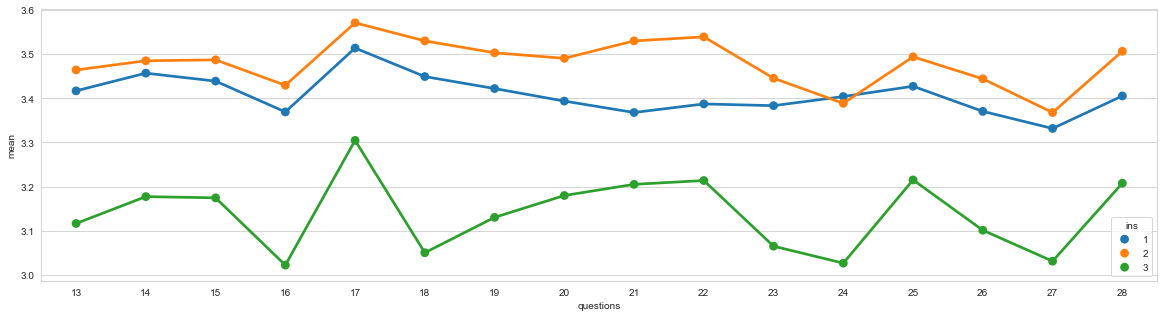

In [16]:
plt.figure(figsize=(20, 5))
sns.pointplot(x="questions", y="mean", data=totalplotdata, hue="ins")

### Based on above graph we can see that According to the Student ratings we see that Instructor 1 and 2 are performing well and got similar rateings but Instructor 3 got less ratings. So we can further explore which course instructor 3 teaches and find out the which course got least ratings.

In [21]:
# Calculate mean for each question response for all the classes for Instructor 3
df_inst3 = df[(df["instr"]==3)]
class_array_for_inst3 = df_inst3["class"].unique().tolist()
questionmeans = []
classlist = []
questions = []
totalplotdata = pd.DataFrame(list(zip(classlist,questions,questionmeans))
                      ,columns=['class','questions', 'mean'])
for class_num in class_array_for_inst3:
    class_data = df_inst3[(df_inst3["class"]==class_num)]
    
    questionmeans = []
    classlist = []
    questions = []
    
    for num in range(1,13):
        questions.append(num)
    
    for col in range(5,17):
        questionmeans.append(class_data.iloc[:,col].mean())
    classlist += 12 * [class_num]
    
    plotdata = pd.DataFrame(list(zip(classlist,questions,questionmeans))
                      ,columns=['class','questions', 'mean'])
    totalplotdata = totalplotdata.append(plotdata, ignore_index=True)

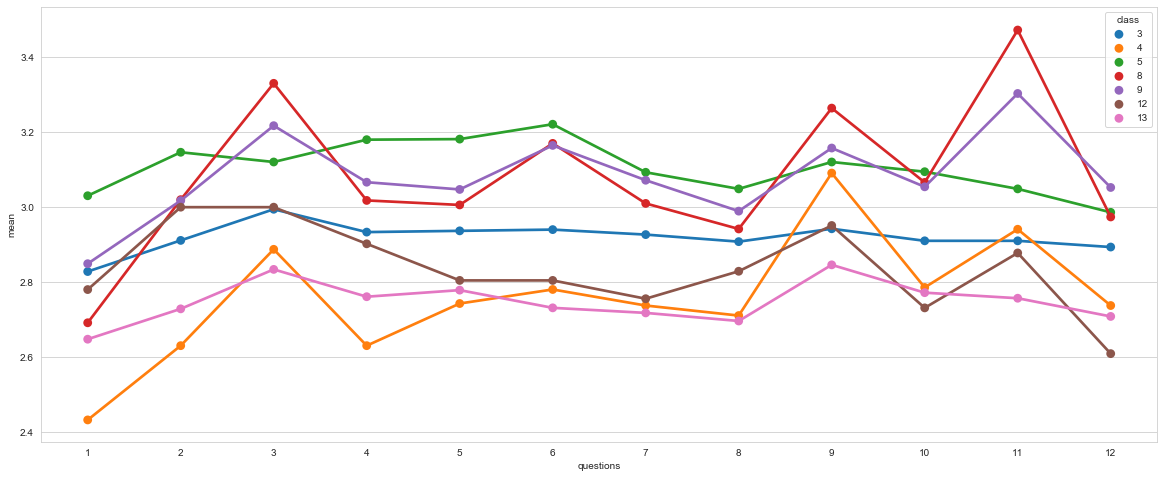

In [22]:
plt.figure(figsize=(20, 8))
sns.pointplot(x="questions", y="mean", data=totalplotdata, hue="class")

## By above analysis we can recommend the instructor 3 for check on course 4 and 13.

# Coorelation matrix

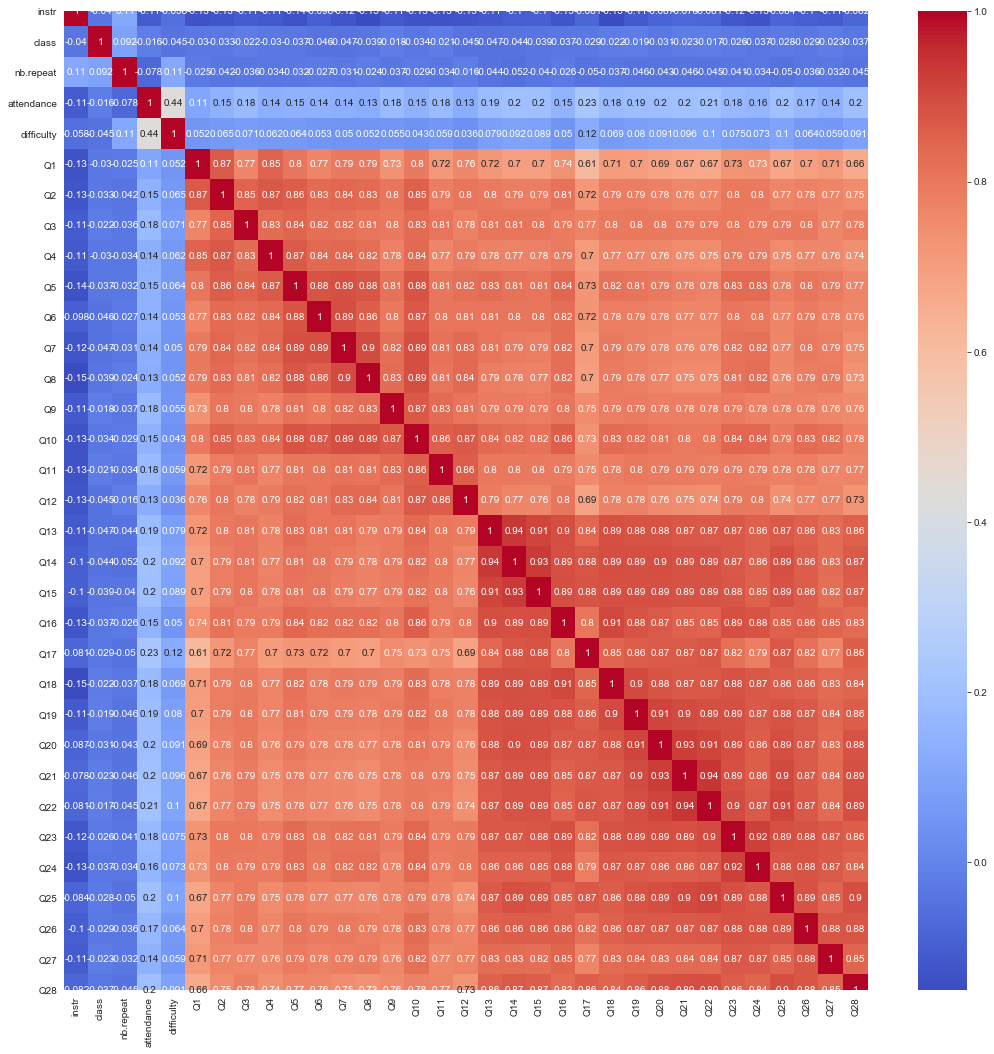

In [34]:
corr = df.corr()
plt.figure(figsize=(18,18))
sns.heatmap(corr, annot=True, cmap='coolwarm')

## Lets begin to cluster the students based on the questionaire data

# Lets try to cluster all the students based on the Question responses data.

In [23]:
dataset_questions = df.iloc[:,5:33]


In [24]:
dataset_questions.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
2,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


# Principal component Analysis

## Principal Component Analysis (PCA) is an unsupervised, non-parametric statistical technique primarily used for dimensionality reduction in machine learning.
## High dimensionality means that the dataset has a large number of features. The primary problem associated with high-dimensionality in the machine learning field is model overfitting, which reduces the ability to generalize beyond the examples in the training set
## Steps Involved in PCA
## 1. Standardize the data. (with mean =0 and variance = 1)
## 2. Compute the Covariance matrix of dimensions.
## 3. Obtain the Eigenvectors and Eigenvalues from the covariance matrix (we can also use correlation matrix or even Single value decomposition, however in this post will focus on covariance matrix).
## 4. Sort eigenvalues in descending order and choose the top k Eigenvectors that correspond to the k largest eigenvalues (k will become the number of dimensions of the new feature subspace k≤d, d is the number of original dimensions).
## 5. Construct the projection matrix W from the selected k Eigenvectors.
## 6. Transform the original data set X via W to obtain the new k-dimensional feature subspace Y.

In [26]:
#lets do a PCA for feature dimensional reduction
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
dataset_questions_pca = pca.fit_transform(dataset_questions)

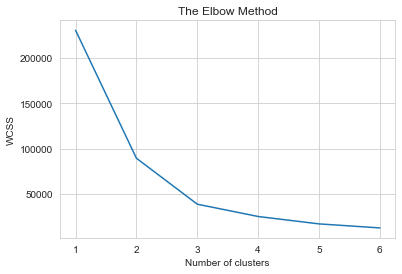

In [27]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 7):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(dataset_questions_pca)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 7), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Based on the Elbow graph , we can go for 3 clusters.

In [35]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',n_jobs=-1, random_state=42)
y_kmeans = kmeans.fit_predict(dataset_questions_pca)

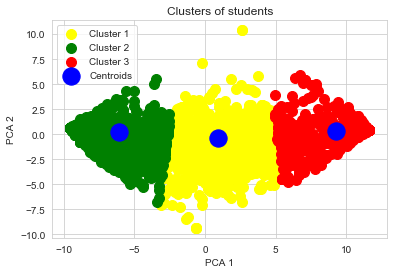

In [36]:
# Visualising the clusters
plt.scatter(dataset_questions_pca[y_kmeans == 0, 0], dataset_questions_pca[y_kmeans == 0, 1], s = 100, c = 'yellow', label = 'Cluster 1')
plt.scatter(dataset_questions_pca[y_kmeans == 1, 0], dataset_questions_pca[y_kmeans == 1, 1], s = 100, c = 'green', label = 'Cluster 2')
plt.scatter(dataset_questions_pca[y_kmeans == 2, 0], dataset_questions_pca[y_kmeans == 2, 1], s = 100, c = 'red', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'blue', label = 'Centroids')
plt.title('Clusters of students')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()

## Looking at the above graph , i see we have 3 clusters of students who have given like Negative, Neutral and Positive feedback

In [37]:
# Let me check the count of students in each cluster
import collections
collections.Counter(y_kmeans)

Counter({0: 2358, 1: 2222, 2: 1240})

## So we have 2358 students who have given negative ratings overall , 2222 students with positive ratings and 1240 students with nuetral response

# Hierarchichal clustering

## Hierarchical clustering is another unsupervised learning algorithm that is used to group together the unlabeled data points having similar characteristics. Hierarchical clustering algorithms falls into following two categories.

## Agglomerative hierarchical algorithms − In agglomerative hierarchical algorithms, each data point is treated as a single cluster and then successively merge or agglomerate (bottom-up approach) the pairs of clusters. The hierarchy of the clusters is represented as a dendrogram or tree structure.

## Divisive hierarchical algorithms − On the other hand, in divisive hierarchical algorithms, all the data points are treated as one big cluster and the process of clustering involves dividing (Top-down approach) the one big cluster into various small clusters.

## Steps to Perform Agglomerative Hierarchical Clustering
## We are going to explain the most used and important Hierarchical clustering i.e. agglomerative. The steps to perform the same is as follows −

## Step 1 − Treat each data point as single cluster. Hence, we will be having, say K clusters at start. The number of data points will also be K at start.

## Step 2 − Now, in this step we need to form a big cluster by joining two closet datapoints. This will result in total of K-1 clusters.

## Step 3 − Now, to form more clusters we need to join two closet clusters. This will result in total of K-2 clusters.

## Step 4 − Now, to form one big cluster repeat the above three steps until K would become 0 i.e. no more data points left to join.

## Step 5 − At last, after making one single big cluster, dendrograms will be used to divide into multiple clusters depending upon the problem.



## Role of Dendrograms in Agglomerative Hierarchical Clustering
## As we discussed in the last step, the role of dendrogram starts once the big cluster is formed. Dendrogram will be used to split the clusters into multiple cluster of related data points depending upon our problem

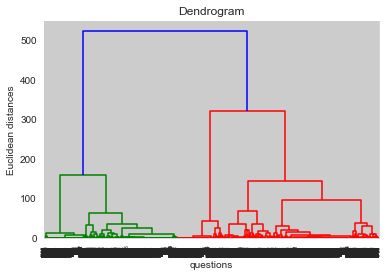

In [31]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(dataset_questions_pca, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('questions')
plt.ylabel('Euclidean distances')
plt.show()

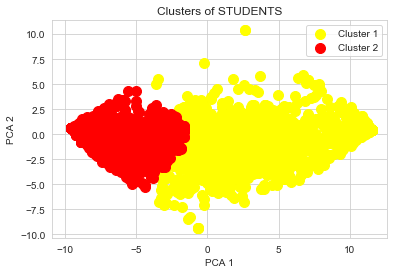

In [32]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(dataset_questions_pca)
X = dataset_questions_pca
# Visualising the clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'yellow', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'red', label = 'Cluster 2')
plt.title('Clusters of STUDENTS')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()


In [33]:
# Let me check the count of students in each cluster
import collections
collections.Counter(y_hc)

Counter({0: 3502, 1: 2318})

### If we compare the clusters of Kmeans and Hierarchical process, we can see cluster with red ( Negative is matching approximately)